# Maze generation using Prim's algorithm

In [7]:
import time

import numpy as np
from matplotlib import pyplot
from numpy.random import randint, shuffle, seed

The following maze generation is of passage carver type i.e. it starts with filled space and carves passage.

In [8]:
def render(maze, shape, colored_pillars=False):
    """Prepares maze with walls
    """
    # corner pillars between adjacent rooms
    if colored_pillars:
        for i in range(1, shape[0]-1, 2):
            for j in range(1, shape[1]-1, 2):
                maze[i, j] = 3
    # build some walls
    maze = np.insert(maze, shape[1], 1, axis=1)
    maze = np.insert(maze, 0, 1, axis=1)
    maze = np.insert(maze, shape[0], np.ones(shape[1]+2), axis=0)
    maze = np.insert(maze, 0, np.ones(shape[1]+2), axis=0)
    return maze

def add_neighbours(lis, x, y, shape):
        if x > 1: lis.append(((y, x), (y, x - 2)))
        if x < shape[1] - 1: lis.append(((y, x), (y, x + 2)))
        if y > 1: lis.append(((y, x), (y - 2, x)))
        if y < shape[0] - 1: lis.append(((y, x), (y + 2, x)))
        return lis

def generate_maze(width=100, height=50):
    """This algorithm is a randomized version of Prim's algorithm.

    1. Start with a grid full of walls.
    2. Pick a cell, mark it as part of the maze. Add the walls of the cell to the wall list.
    3. While there are walls in the list:
        1. Pick a random wall from the list. 
        If only one of the two cells that the wall divides is visited, then:
            1. Make the wall a passage and mark the unvisited cell as part of the maze.
            2. Add the neighboring walls of the cell to the wall list.
        2. Remove the wall from the list
    """
    seed(int(time.time()))
    #seed(0)
    shape = ((height // 2) * 2 + 1, (width // 2) * 2 + 1) # only odd shapes
    total_nodes = ((shape[0] // 2) + 1) * ((shape[1] // 2) + 1)
    maze = np.ones(shape)
    height_range, width_range = np.arange(0, shape[0], 2), np.arange(0, shape[1], 2)
    # need a random starting point with even coord
    x = width_range[randint(0, len(width_range))]
    y = height_range[randint(0, len(height_range))]
    maze[y, x] = 0
    to_visit = add_neighbours([], x, y, shape)
    while to_visit:
        get_random_wall = to_visit[randint(0, len(to_visit))]
        (y, x), (ny, nx) = get_random_wall
        if (0 <= nx <= shape[1] - 1) and (0 <= ny <= shape[0] - 1) and maze[ny, nx] == 1:
            maze[ny, nx] = 0 # marking neighbour as visited and carve block
            # carve passage for the edge
            maze[ny + (y - ny) // 2, nx + (x - nx) // 2] = 0
            to_visit = add_neighbours(to_visit, nx, ny, shape)
            to_visit.remove((get_random_wall[1], get_random_wall[0])) # dont want to visit same edge again
        to_visit.remove(get_random_wall)
    return maze, shape

Code to show generate maze in notebook using matplotlib

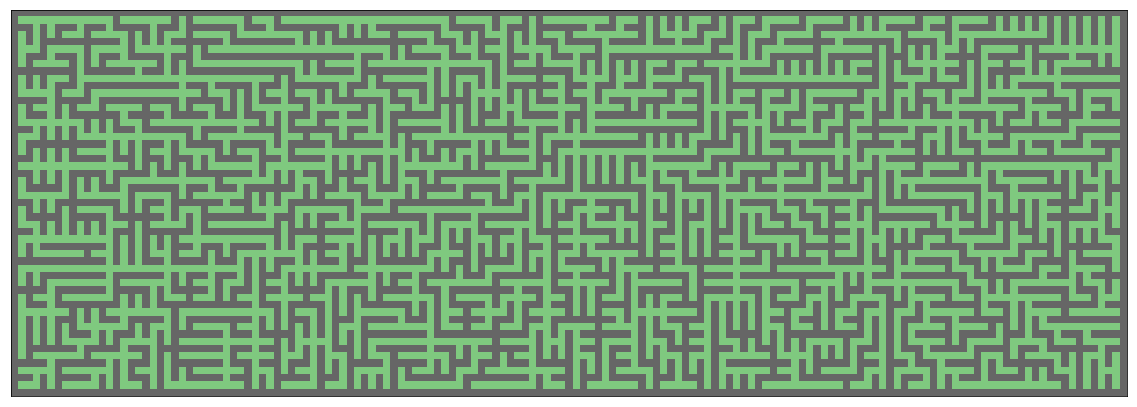

In [9]:
%matplotlib inline
maze, shape = generate_maze(150, 50)
for_render = render(maze, shape, False)
pyplot.figure(figsize=(20, 20))
pyplot.imshow(for_render, cmap=pyplot.get_cmap('Accent'), interpolation='nearest')
pyplot.xticks([]), pyplot.yticks([])
pyplot.show()